In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
pd.set_option('display.max_columns', None)

print(tf.__version__)

%run biosignal_and_tetris_result_service.ipynb

2.2.0


In [2]:
import os
results = get_player_results()
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

Current working directory: /Users/krzysztofwojdak/Documents/win-or-loose-ai-analyzer


# Merged with tetris results / per round
### biosignals - (Player 1)

In [3]:
results

{'E03_R02_S01': [{'p1p2':             Czas  A: BVP1  B: BVP2  C: EMG1  D: EMG2  E: Skin Cond  F: Temp1  \
   512     2.000000   36.342   45.894   23.707    2.525         5.151    32.185   
   513     2.003906   36.313   45.624   21.687    2.473         5.151    32.185   
   514     2.007812   36.283   45.342   19.667    2.421         5.150    32.185   
   515     2.011719   36.252   45.051   19.356    2.473         5.150    32.185   
   516     2.015625   36.219   44.754   20.651    2.421         5.149    32.185   
   ...          ...      ...      ...      ...      ...           ...       ...   
   16379  63.980469   39.719   34.507    9.931    9.982         5.984    31.911   
   16380  63.984375   39.700   34.450   10.656   10.241         5.984    31.911   
   16381  63.988281   39.671   34.396   13.659   11.640         5.984    31.911   
   16382  63.992188   39.633   34.345   16.715   12.727         5.984    31.911   
   16383  63.996094   39.587   34.298   17.906   12.727         

In [4]:
pwd

'/Users/krzysztofwojdak/Documents/win-or-loose-ai-analyzer'

### biosignals - (Player 2)

In [5]:
results['E03_R02_S01'][0]['p2'].info()
results['E03_R02_S01'][0]['p2']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15872 entries, 512 to 16383
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Czas              15872 non-null  float64
 1   B: BVP2           15872 non-null  float64
 2   D: EMG2           15872 non-null  float64
 3   H: Thor Resp      15872 non-null  float64
 4   I: Temp2          15872 non-null  float64
 5   SC-Pro/Flex - 1J  15872 non-null  float64
 6   Draw              15872 non-null  uint8  
 7   Lose              15872 non-null  uint8  
 8   Win               15872 non-null  uint8  
dtypes: float64(6), uint8(3)
memory usage: 914.5 KB


,Czas,B: BVP2,D: EMG2,H: Thor Resp,I: Temp2,SC-Pro/Flex - 1J,Draw,Lose,Win
512,2.000000,45.894,2.525,10.432,32.835,1.914,1,0,0
513,2.003906,45.624,2.473,10.434,32.835,1.914,1,0,0
514,2.007812,45.342,2.421,10.436,32.835,1.914,1,0,0
515,2.011719,45.051,2.473,10.437,32.835,1.915,1,0,0
516,2.015625,44.754,2.421,10.439,32.835,1.915,1,0,0
...,...,...,...,...,...,...,...,...,...
16379,63.980469,34.507,9.982,9.254,32.961,2.033,0,0,1
16380,63.984375,34.450,10.241,9.260,32.961,2.033,0,0,1
16381,63.988281,34.396,11.640,9.267,32.961,2.033,0,0,1
16382,63.992188,34.345,12.727,9.274,32.961,2.033,0,0,1


### biosignals - (Player 1&2)

In [6]:
results['E03_R02_S01'][0]['p1p2'].info()
results['E03_R02_S01'][0]['p1p2']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15872 entries, 512 to 16383
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Czas              15872 non-null  float64
 1   A: BVP1           15872 non-null  float64
 2   B: BVP2           15872 non-null  float64
 3   C: EMG1           15872 non-null  float64
 4   D: EMG2           15872 non-null  float64
 5   E: Skin Cond      15872 non-null  float64
 6   F: Temp1          15872 non-null  float64
 7   G: Abd Resp       15872 non-null  float64
 8   H: Thor Resp      15872 non-null  float64
 9   I: Temp2          15872 non-null  float64
 10  SC-Pro/Flex - 1J  15872 non-null  float64
 11  Draw-1            15872 non-null  uint8  
 12  Lose-1            15872 non-null  uint8  
 13  Win-1             15872 non-null  uint8  
 14  Draw-2            15872 non-null  uint8  
 15  Lose-2            15872 non-null  uint8  
 16  Win-2             15872 non-null  uint

,Czas,A: BVP1,B: BVP2,C: EMG1,D: EMG2,E: Skin Cond,F: Temp1,G: Abd Resp,H: Thor Resp,I: Temp2,SC-Pro/Flex - 1J,Draw-1,Lose-1,Win-1,Draw-2,Lose-2,Win-2
512,2.000000,36.342,45.894,23.707,2.525,5.151,32.185,12.010,10.432,32.835,1.914,1,0,0,1,0,0
513,2.003906,36.313,45.624,21.687,2.473,5.151,32.185,12.005,10.434,32.835,1.914,1,0,0,1,0,0
514,2.007812,36.283,45.342,19.667,2.421,5.150,32.185,12.000,10.436,32.835,1.914,1,0,0,1,0,0
515,2.011719,36.252,45.051,19.356,2.473,5.150,32.185,11.995,10.437,32.835,1.915,1,0,0,1,0,0
516,2.015625,36.219,44.754,20.651,2.421,5.149,32.185,11.991,10.439,32.835,1.915,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,63.980469,39.719,34.507,9.931,9.982,5.984,31.911,13.265,9.254,32.961,2.033,0,1,0,0,0,1
16380,63.984375,39.700,34.450,10.656,10.241,5.984,31.911,13.266,9.260,32.961,2.033,0,1,0,0,0,1
16381,63.988281,39.671,34.396,13.659,11.640,5.984,31.911,13.267,9.267,32.961,2.033,0,1,0,0,0,1
16382,63.992188,39.633,34.345,16.715,12.727,5.984,31.911,13.268,9.274,32.961,2.033,0,1,0,0,0,1


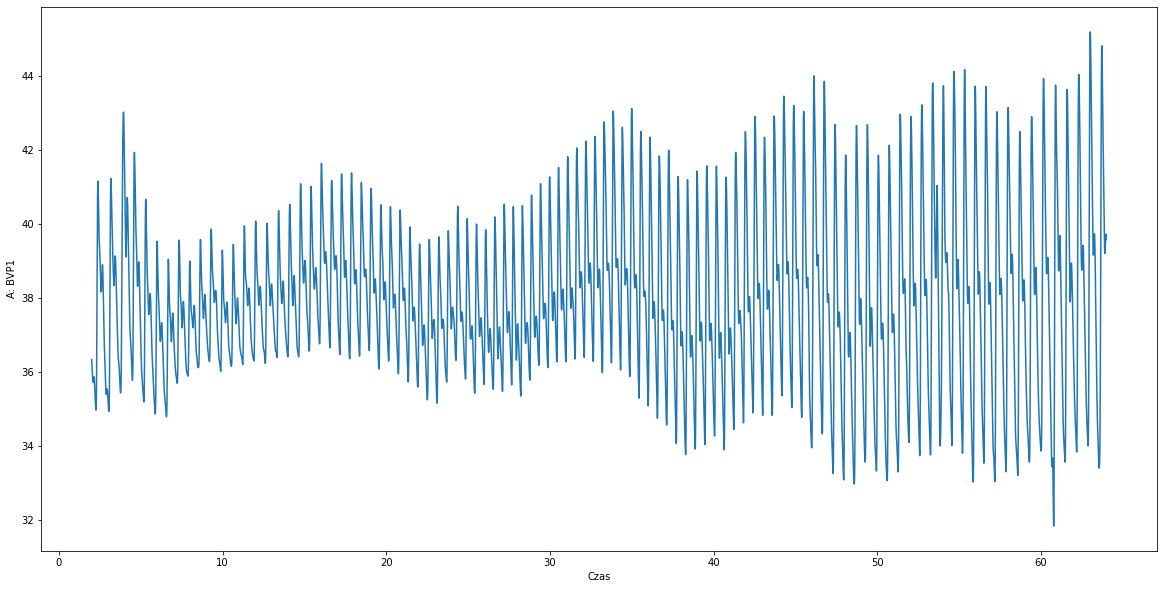

In [7]:
### biosignals - A: BVP1 (Player 1)

plt.figure(figsize=(20,10))
sns.lineplot(data=results['E03_R02_S01'][0]['p1'], x="Czas", y="A: BVP1")
plt.show()


### biosignals - B: BVP2 (Player 2)

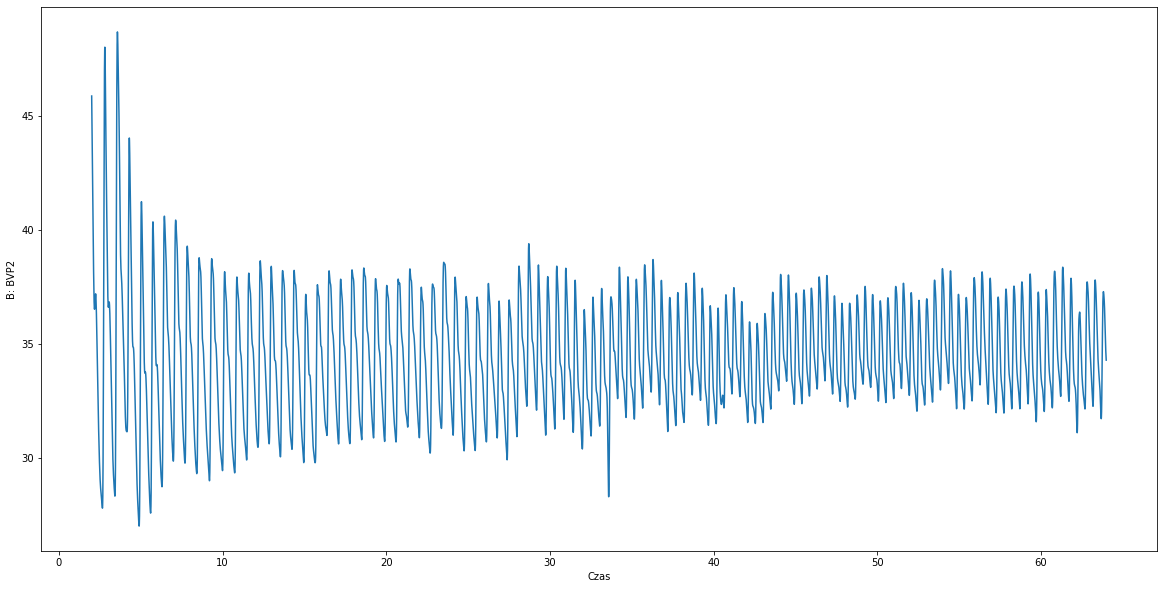

In [8]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['E03_R02_S01'][0]['p2'], x="Czas", y="B: BVP2")
plt.show()
#

### biosignals - C: EMG1 (Player 1)

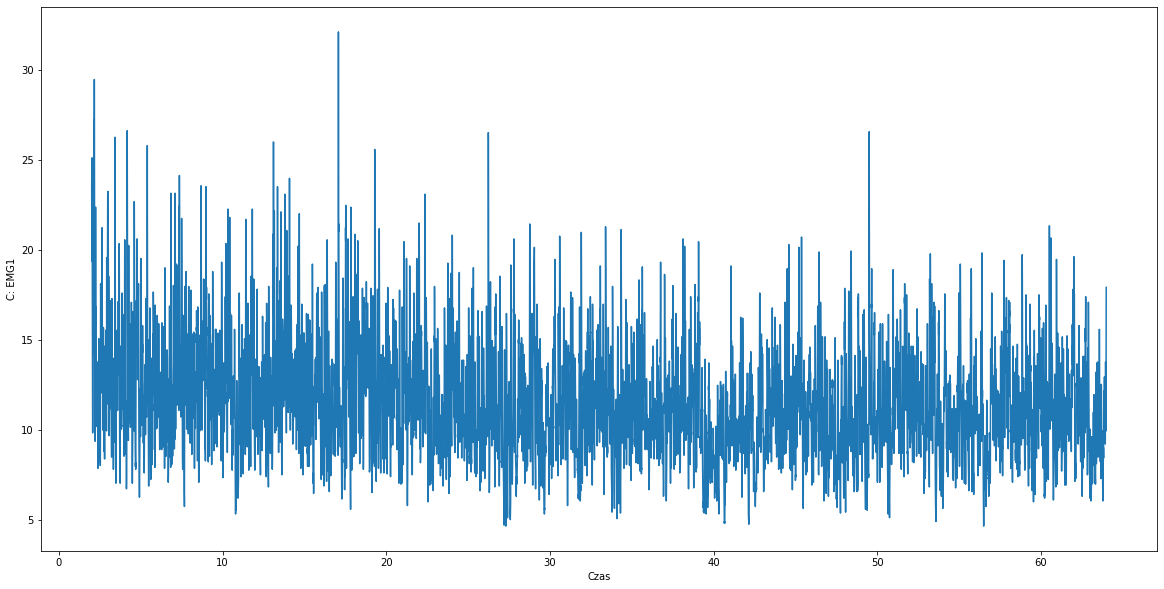

In [9]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['E03_R02_S01'][0]['p1'], x="Czas", y="C: EMG1")
plt.show()

### biosignals - D: EMG2 (Player 2)

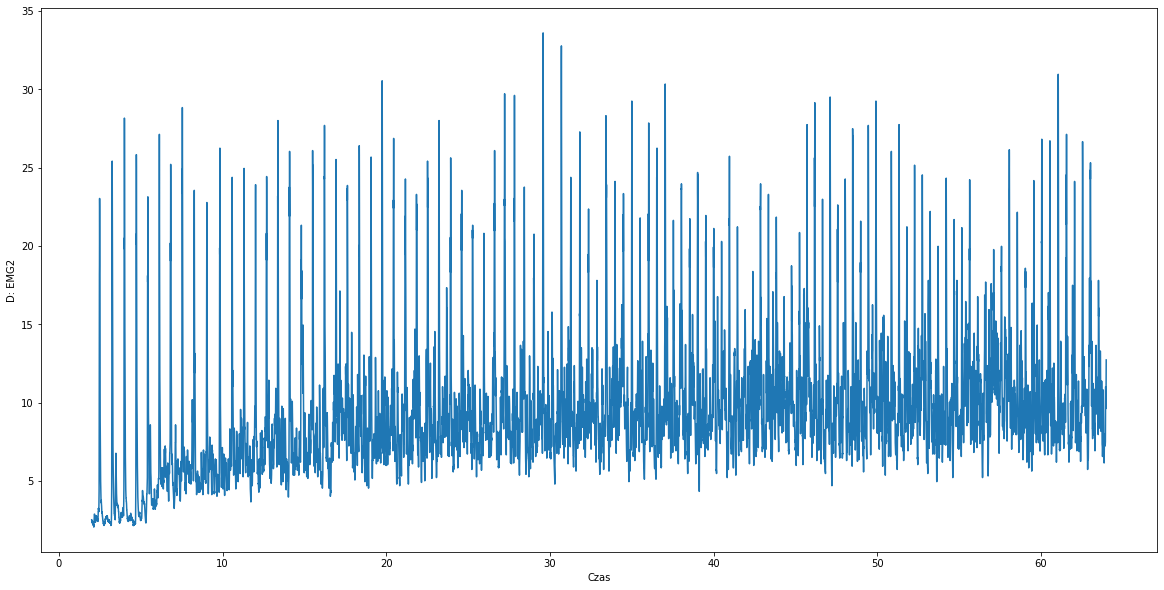

In [10]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['E03_R02_S01'][0]['p2'], x="Czas", y="D: EMG2")
plt.show()

### biosignals - E: Skin Cond (Player 1)

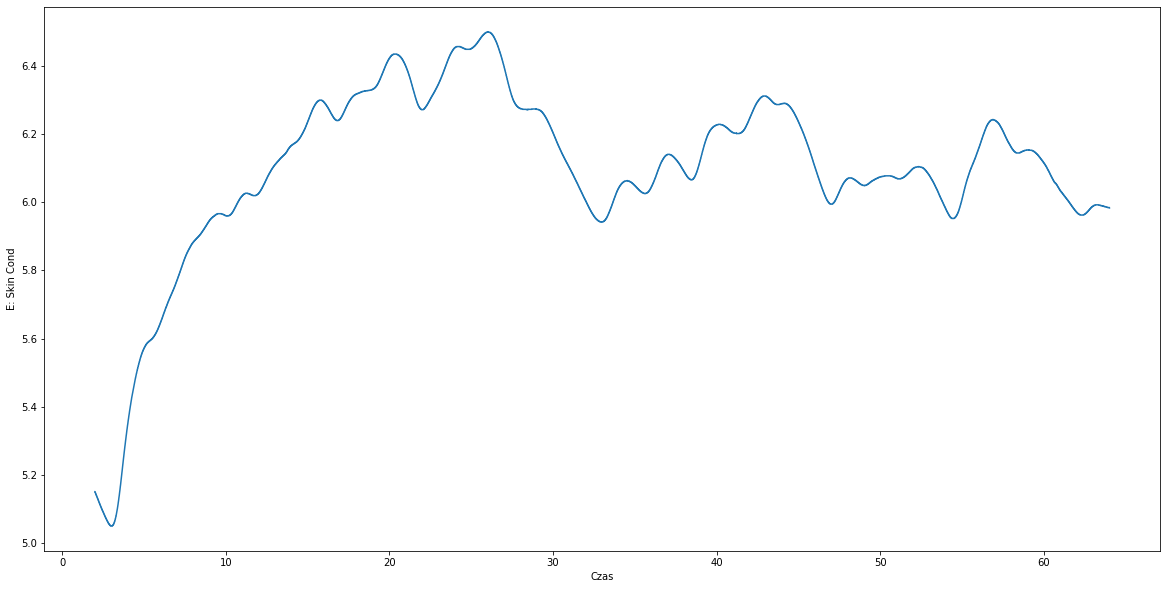

In [11]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['E03_R02_S01'][0]['p1'], x="Czas", y="E: Skin Cond")
plt.show()

### biosignals - SC-Pro/Flex - 1J (Player 2)

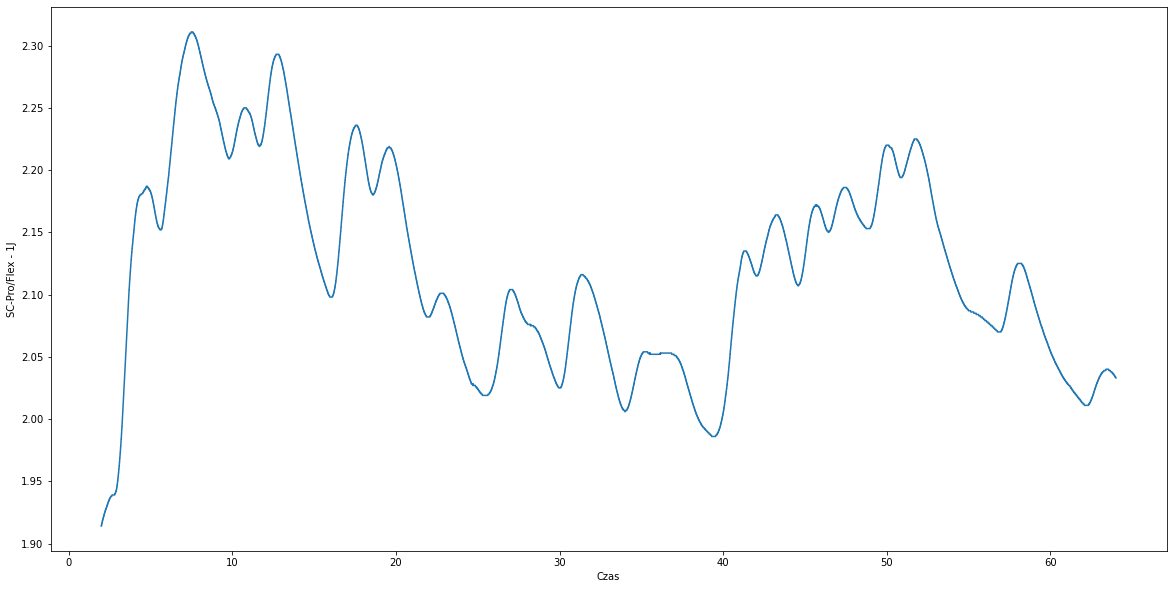

In [12]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['E03_R02_S01'][0]['p2'], x="Czas", y="SC-Pro/Flex - 1J")
plt.show()


### biosignals - F: Temp1 (Player 1)

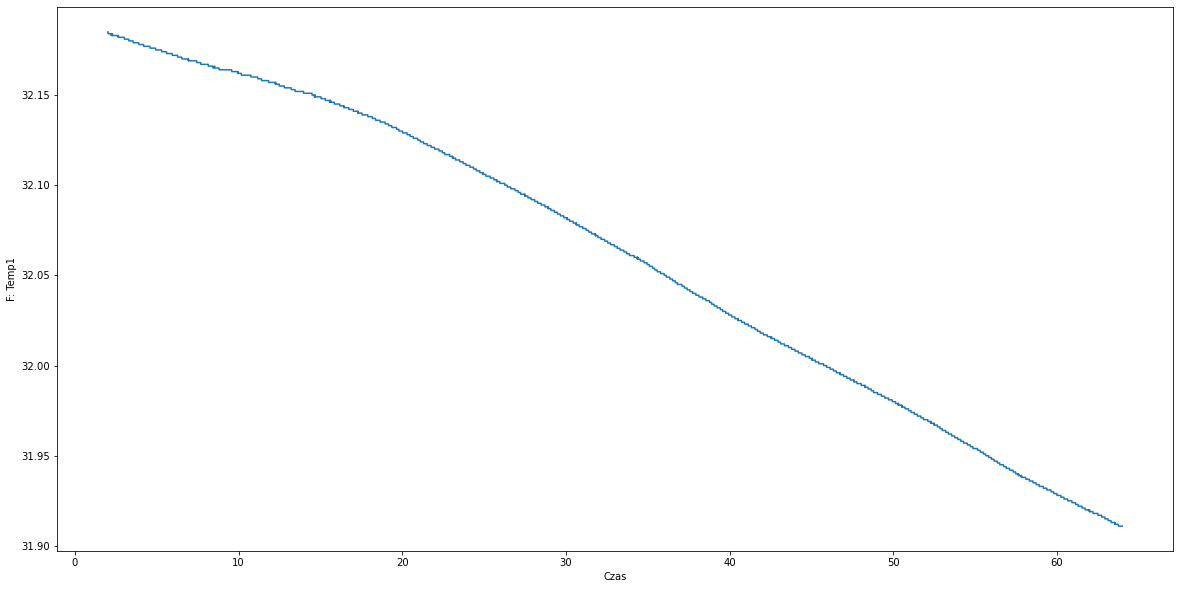

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['E03_R02_S01'][0]['p1'], x="Czas", y="F: Temp1")
plt.show()

### biosignals - I: Temp2 (Player 2)

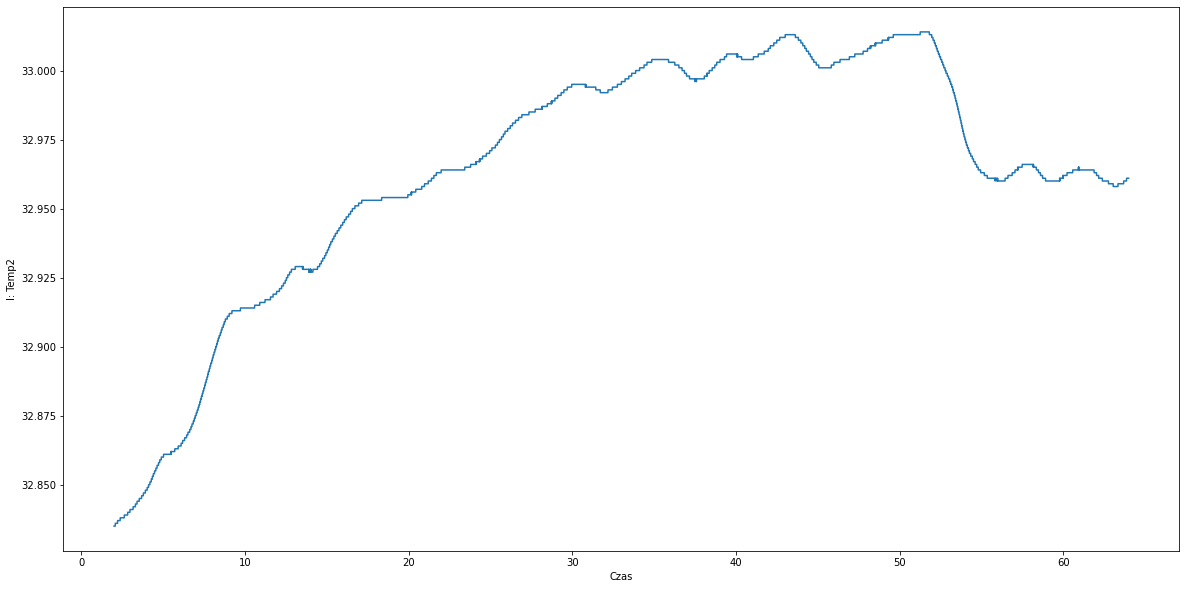

In [14]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['E03_R02_S01'][0]['p2'], x="Czas", y="I: Temp2")
plt.show()

### biosignals - G: Abd Resp (Player 1)

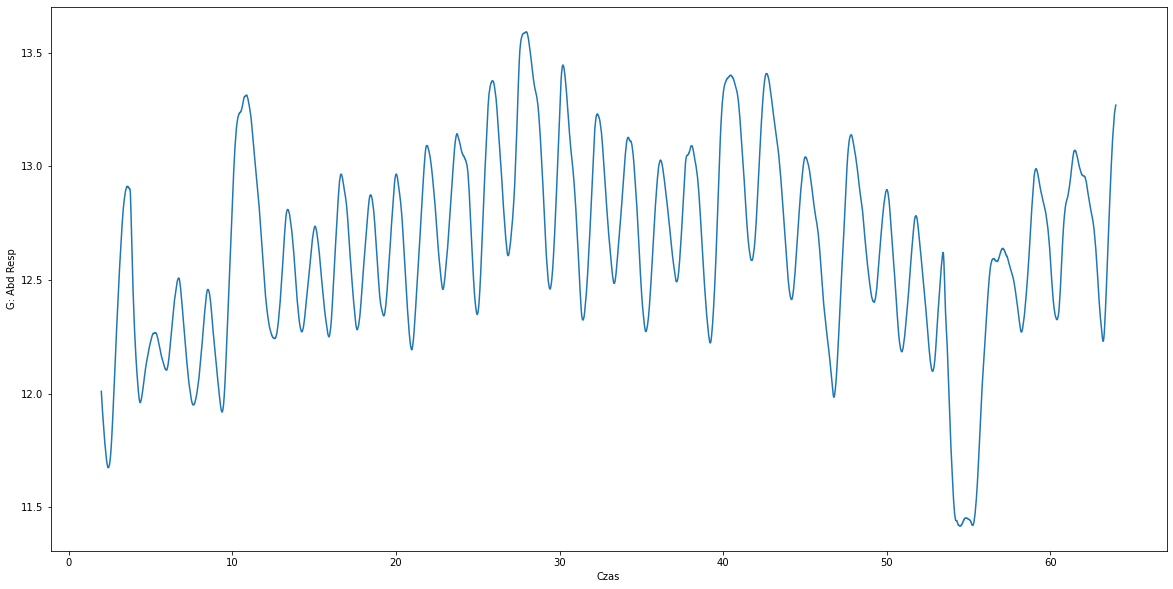

In [15]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['E03_R02_S01'][0]['p1'], x="Czas", y="G: Abd Resp")
plt.show()

### biosignals - H: Thor Resp (Player 2)

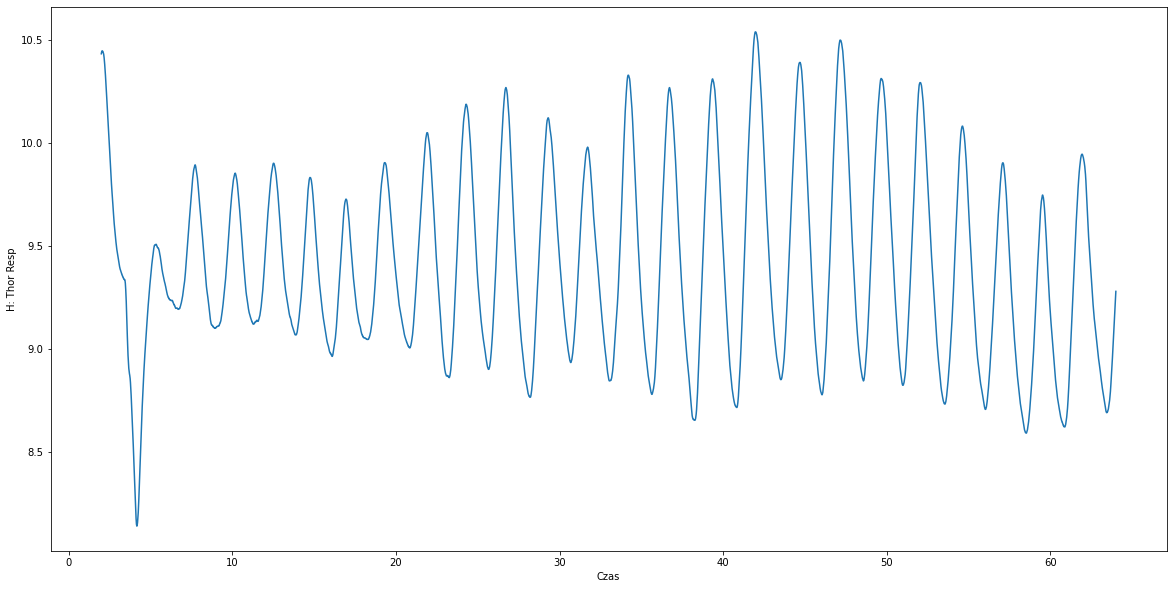

In [16]:
plt.figure(figsize=(20,10))
sns.lineplot(data=results['E03_R02_S01'][0]['p2'], x="Czas", y="H: Thor Resp")
plt.show()